# Лабораторная работа №2
# Способы получения случайных чисел с заданным законом распределения

**Цель работы**
1. Практическое освоение методов получения случайных величин, имеющих 
    дискретный характер распределения. 
2. Разработка программных датчиков дискретных случайных величин.
3. Исследование характеристик моделируемых датчиков:
    + Оценка точности моделирования: вычисление математического 
      ожидания и дисперсии, сравнение полученных оценок с 
      соответствующими теоретическими значениями.
4. Гpафическое представление функции плотности распределения и 
    интегральной функции распределения.

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
n = 10**4

In [35]:
def cumulative(density):
    dens = [0]
    n = sum(density)
    for i in range(len(density)):
        dens.append(density[i] / n + dens[i])
    return dens

## Равномерное распределение

In [36]:
def p_uniform(low, up):
    u = random.random()
    r = int((up - low + 1)*u + low)
    return r

In [37]:
uniform_dist = np.array([p_uniform(1, 100) for i in range(n)])
uniform_mean = uniform_dist.mean()
uniform_var = uniform_dist.var()

In [69]:
print("Оценка")
print("M =", uniform_mean)
print("D =", uniform_var)
print("Погрешность")
print('m', abs(50.5 - uniform_mean))
print('d', abs(833.25 - uniform_var))

Оценка
M = 50.2604
D = 830.0873918400001
Погрешность
m 0.23960000000000292
d 3.162608159999877


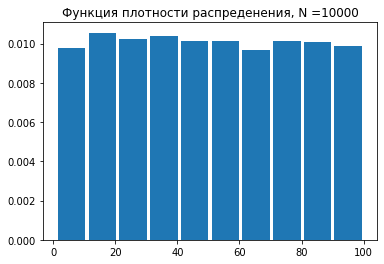

In [39]:
plt.title('Функция плотности распреденения, N =' + str(n))
hist, bin_edges, _ = plt.hist(uniform_dist, density=True, rwidth = 0.9)
plt.show()

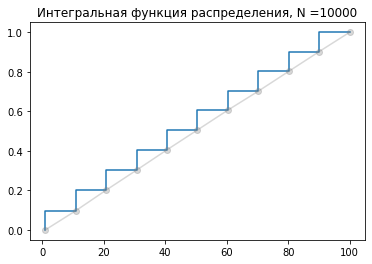

In [40]:
plt.title('Интегральная функция распределения, N =' + str(n))
plt.step(bin_edges, cumulative(hist), label='pre (default)')
plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
plt.show()

## Биномиальное распределение

In [41]:
def p_bin(p, N):
    r = random.random()
    pr = (1 - p)**N
    m = 0
    while r >= pr:
        r -= pr
        pr *= (N - m)/(m + 1) * p/(1 - p)
        m += 1
    return m

In [42]:
bin_dist = np.array([p_bin(0.5, 10) for i in range(n)])
bin_mean = bin_dist.mean()
bin_var = bin_dist.var()

In [70]:
print("Оценка")
print("M =", bin_mean)
print("D =", bin_var)
print("Погрешность")
print('m', abs(5. - bin_mean))
print('d', abs(2.5 - bin_var))

Оценка
M = 5.0149
D = 2.50347799
Погрешность
m 0.014899999999999913
d 0.003477989999999931


In [44]:
bin_edges[:-1]

array([ 1. , 10.9, 20.8, 30.7, 40.6, 50.5, 60.4, 70.3, 80.2, 90.1])

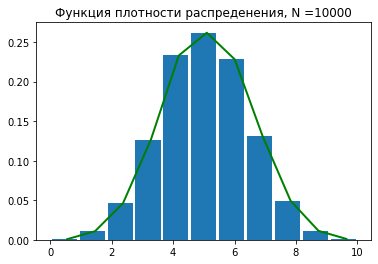

In [45]:
plt.title('Функция плотности распреденения, N =' + str(n))
hist, bin_edges, _ = plt.hist(bin_dist, density=True, bins=11, rwidth = 0.9)
plt.plot(list(map(lambda x: x + 0.55, bin_edges[:-1])), hist, lw = 2, color='g')
plt.show()

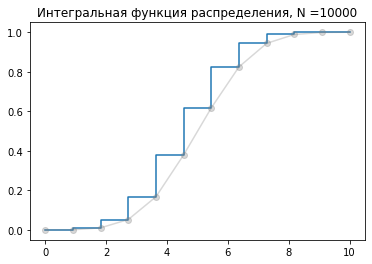

In [46]:
plt.title('Интегральная функция распределения, N =' + str(n))
plt.step(bin_edges, cumulative(hist), label='pre (default)')
plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
plt.show()

## Геометрическое распределение

### 1 алгоритм

In [47]:
def p_geom1(p):
    r = random.random()
    pr = p
    m = 1
    while r >= pr:
        r -= pr
        pr *= (1-p)
        m += 1
    return m

In [48]:
g1 = np.array([p_geom1(0.5) for i in range(n)])
g1_mean = g1.mean()
g1_var = g1.var()

### 2 алгоритм

In [49]:
def p_geom2(p):
    r = random.random()
    k = 1
    
    while r > p:
        k += 1
        r = random.random()
    return k

In [50]:
g2 = np.array([p_geom2(0.5) for i in range(n)])
g2_mean = g2.mean()
g2_var = g2.var()

### 3 алгоритм

In [51]:
def p_geom3(p):
    r = random.random()
    m = int(np.log(r)/np.log(1 - p)) + 1
    
    return m

In [52]:
g3 = np.array([p_geom3(0.5) for i in range(n)])
g3_mean = g3.mean()
g3_var = g3.var()

1 алгоритм

Оценка
M = 2.0314
D = 2.12961404
Погрешность
m 0.031400000000000095
d 0.12961403999999987


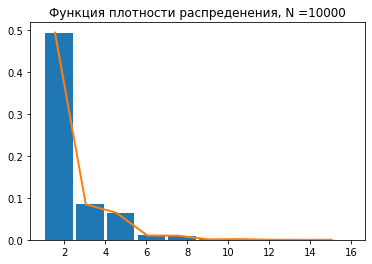

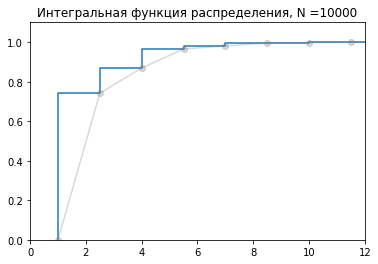

2 алгоритм

Оценка
M = 2.0077
D = 2.0030407099999996
Погрешность
m 0.007699999999999818
d 0.0030407099999996134


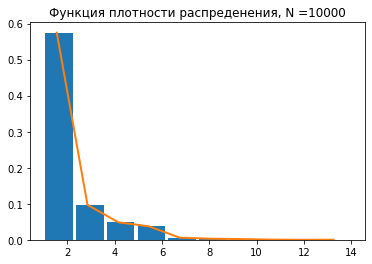

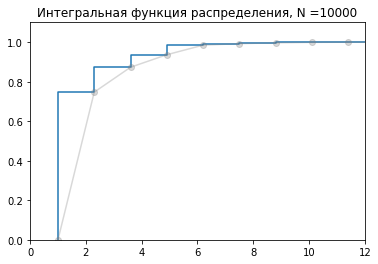

3 алгоритм

Оценка
M = 1.9849
D = 1.9334719900000004
Погрешность
m 0.015099999999999891
d 0.06652800999999964


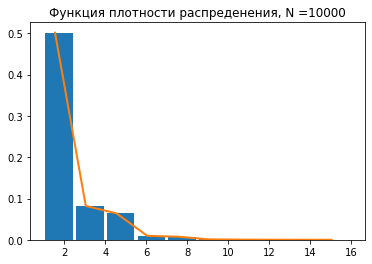

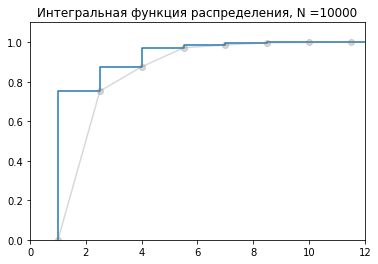

In [71]:
for i, g in enumerate([g1, g2, g3]):
    M, D = g.mean(), g.var()
    print(str(i + 1) + ' алгоритм\n')
    print("Оценка")
    print("M =", M)
    print("D =", D)
    print("Погрешность")
    print('m', abs(2. - M))
    print('d', abs(2. - D))
    
    plt.title('Функция плотности распреденения, N =' + str(n))

    hist, bin_edges, _ = plt.hist(g, density=True, rwidth = 0.9)
    plt.plot(list(map(lambda x: x + 0.55, bin_edges[:-1])), hist, lw = 2)
    plt.show()
    
    plt.title('Интегральная функция распределения, N =' + str(n))
    plt.axis([0, 12, 0, 1.1])
    plt.step(bin_edges, cumulative(hist), label='pre (default)')
    plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
    plt.show()

## Распределение Пуассона

### 1 алгоритм

In [54]:
def p_poisson1(mu):
    r = random.random()
    pr = np.exp(-mu)
    m = 0
    while r >= pr:
        r -= pr
        m += 1
        pr *= mu/m
    return m

In [55]:
poisson1_dist = np.array([p_poisson1(10) for i in range(n)])
poisson1_mean = poisson1_dist.mean()
poisson1_var = poisson1_dist.var()

### 2 алгоритм

In [56]:
def p_poisson2(mu):
    r = random.random()
    pr = r
    m = 0
    while pr >= np.exp(-mu):
        r = random.random()
        pr *= r
        m += 1
    return m

In [57]:
poisson2_dist = np.array([p_poisson2(10) for i in range(n)])
poisson2_mean = poisson2_dist.mean()
poisson2_var = poisson2_dist.var()

1 алгоритм

Оценка
M = 9.9682
D = 10.08598876
Погрешность
m 0.031800000000000495
d 0.08598875999999933


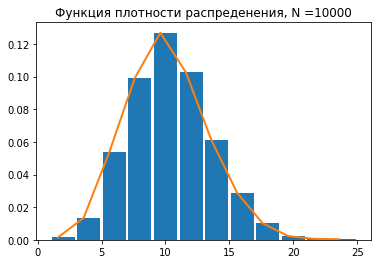

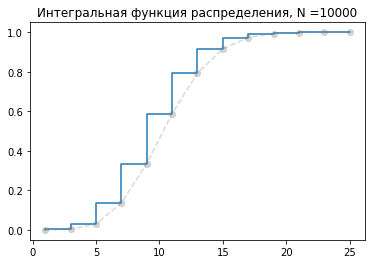

2 алгоритм

Оценка
M = 9.9452
D = 9.789396960000001
Погрешность
m 0.05480000000000018
d 0.21060303999999874


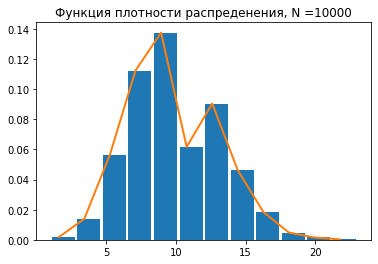

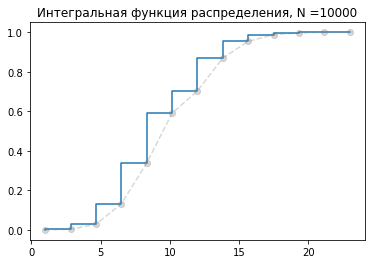

In [72]:
for i, p in enumerate([poisson1_dist, poisson2_dist]):
    M, D = p.mean(), p.var()
    print(str(i + 1) + ' алгоритм\n')
    print("Оценка")
    print("M =", M)
    print("D =", D)
    print("Погрешность")
    print('m', abs(10. - M))
    print('d', abs(10. - D))
    
    plt.title('Функция плотности распреденения, N =' + str(n))
 
    hist, bin_edges, _ = plt.hist(p, density=True, bins=12, rwidth = 0.9)
    plt.plot(list(map(lambda x: x + 0.6, bin_edges[:-1])), hist, lw = 2)
    plt.show()

    plt.title('Интегральная функция распределения, N =' + str(n))
    plt.step(bin_edges, cumulative(hist), label='pre (default)')
    plt.plot(bin_edges, cumulative(hist), 'o--', color='grey', alpha=0.3)
    plt.show()

## 3 вариант индивидуального задания

**Постановка задачи:**

Смоделировать   случайную   величину   X, имеющую геометрический   закон распределения с параметром p=0.8. На основе выборки объема 100 исследовать статистические характеристики случайной величины X: построить доверительный интервал для параметра распределения p, соответствующий доверительной вероятности равной 0,1.

Доверительный интервал:

$$(𝜆 − 𝑡𝛼\frac{𝜎}{√𝑛}; 𝜆 + 𝑡𝛼\frac{𝜎}{√𝑛})$$

Где 𝜎 – среднеквадратическое отклонение, 𝑡𝛼 – коэффициент Стьюдента (𝑡0.9 = 1.729).
Генерируем выборку из 100 элементов по геометрическому закону первым, вторым и третьим алгоритмами 
из лабораторной, считаем для нее ср. кв. отклонение и высчитываем интервал.

In [59]:
p_ind = 0.8
n_ind = 100
t_st = 1.729

1 алгоритм
Левая граница		Правая граница
0.6989459033190638 0.9010540966809363


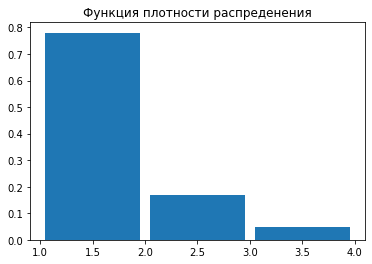

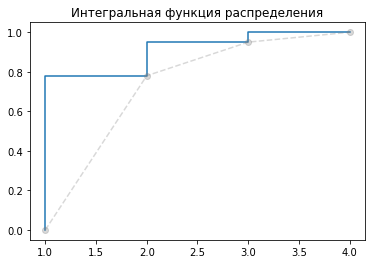

2 алгоритм
Левая граница		Правая граница
0.6751882335234375 0.9248117664765626


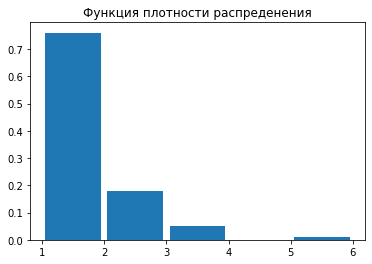

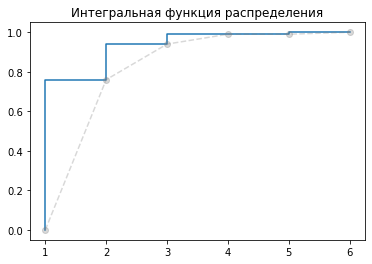

3 алгоритм
Левая граница		Правая граница
0.7178224652414056 0.8821775347585945


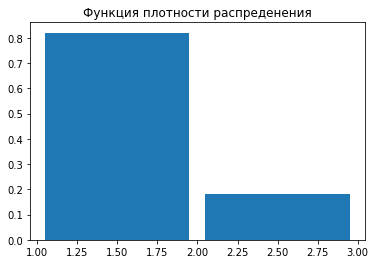

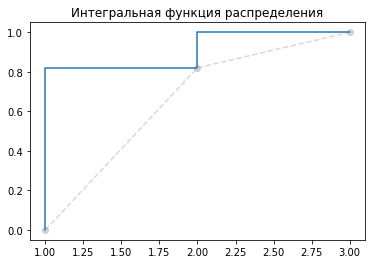

In [79]:
for i, foo in enumerate([p_geom1, p_geom2, p_geom3]):
    arr = np.array([foo(p_ind) for i in range(n_ind)])
    
    coef = t_st * arr.std() / n_ind**0.5
    
    print(str(i + 1) + " алгоритм")
    print("Левая граница\t\tПравая граница")
    print(p_ind - coef, p_ind + coef)
    
    hist, bin_edges, _ = plt.hist(arr, list(range(min(arr), max(arr)+1)), density=True, rwidth = 0.9)
    plt.title('Функция плотности распреденения')
    plt.show()
    
    plt.title('Интегральная функция распределения')
    plt.step(bin_edges, cumulative(hist), label='pre (default)')
    plt.plot(bin_edges, cumulative(hist), 'o--', color='grey', alpha=0.3)
    plt.show()

## Выводы

- Все рассмотренные способы получения распределений позволяют получать 
    распределения, у которых точечная оценка близка к теоретической
- Построенные графики распределений похожи на теоретические
- В качестве индивидуального задания был построен доверительный интервал для 
    параметра распределения p геометрического закона